In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from datetime import datetime
from pmdarima.arima import auto_arima

In [ ]:
#Read data from csv file
data = pd.read_csv('AirPassengers.csv', index_col='Month', parse_dates=True)
display(data)

In [ ]:
#Define the month and year as index
month_year = data.index
print(month_year)
#Define the passengers for each month_year
Passenger = data['#Passengers']

In [ ]:
#Define training and testing data
train = data.loc['1949-01-01':'1959-12-01'] #
test = data.loc['1960-01-01':] #Last year
display(train)
display(test)

In [ ]:
#Create a model from the train data
time_model_train = auto_arima(train, start_p=1, start_d= 0, start_q=1,  max_p=3, max_d=2, max_q=5, start_P=0,  seasonal=True, m=12, trace=True, stepwise=False)

This code is using the auto_arima function from the pmdarima library to fit an auto-regressive integrated moving average (ARIMA) model to the time series data. ARIMA is a popular method for time series forecasting that combines both autoregression (AR) and moving average (MA) models to produce a more accurate prediction.

The start_p, start_q, start_d, start_P parameters specify the starting values for the autoregression (p), moving average (q), differences (d), and seasonal autoregression (P) orders. The max_p and max_q parameters specify the maximum values for p and q respectively. The seasonal parameter specifies whether the model should have a seasonal component or not. The m parameter specifies the number of time steps in the seasonal component. The trace parameter is a boolean that controls whether the function displays the intermediate steps in the optimization process or not. The stepwise parameter is a boolean that determines whether the function should use stepwise optimization to determine the ARIMA orders or not.

The function returns an ARIMA model object that has been fitted to the input data. The model can then be used to make predictions on future time series data.

In [ ]:
#Display a summary of the training model
print(time_model_train.summary())

In [ ]:
#Predict the test data
test_forecast = time_model_train.predict(n_periods=12)

In [ ]:
#Plot the test data (last year) and the predicted data
plt.title('Test Data and Predicted Data' + '\n' + str(time_model_train), loc='center')
plt.plot(test, color = 'blue', label = 'Actual')
plt.plot(test_forecast, color='red', label = 'Predicted')
plt.legend(loc='best', frameon=False)
plt.xlabel('Year')
plt.ylabel('Passengers')

In [ ]:
#Plot the data and the predicted data
plt.figure(figsize=(10,6))
plt.title('Test Data and Predicted Data' + '\n' + str(time_model_train), loc='center')
plt.plot(Passenger, color = 'blue', label = 'Actual')
plt.plot(test_forecast, color='red', label = 'Predicted')
plt.legend(loc='best', frameon=False)
plt.xlabel('Year')
plt.ylabel('Passengers')

In [ ]:
#Forecast the next 12 months using all the data
time_model = auto_arima(data, start_p=1, start_d= 0, start_q=1,  max_p=3, max_d=2, max_q=5, start_P=0,  seasonal=True, m=12, trace=True, stepwise=False)

In [ ]:
#Display a summary of the model
print(time_model.summary())

In [64]:
del forecast, forecast_df

In [93]:
#Predict the next 12 months with a confidence level of 95%
forecast, confint = time_model.predict(n_periods=12, return_conf_int=True, alpha=0.05)
lower, upper = confint[:, 0], confint[:, 1]


In [94]:
#Convert forecast, lower and upper to a dataframe
def forecast_to_dataframe(forecast, lower, upper):
    forecast_df = pd.DataFrame(forecast)
    lower_df = pd.DataFrame(lower)
    upper_df = pd.DataFrame(upper)
    forecast_df.columns = ['Forecast']
    lower_df.columns = ['Lower Bound']
    upper_df.columns = ['Upper Bound']
    return forecast_df, lower_df, upper_df

forecast, lower, upper = forecast_to_dataframe(forecast, lower, upper)
display(data)
display(forecast, lower, upper)

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


,Forecast
1961-01-01,450.053613
1961-02-01,422.963495
1961-03-01,465.827879
1961-04-01,490.334823
1961-05-01,507.781544
1961-06-01,575.302540
1961-07-01,663.439945
1961-08-01,657.623670
1961-09-01,549.387561
1961-10-01,495.696128


,Lower Bound
0,429.175487
1,398.916071
2,438.982750
3,460.957224
4,476.073097
5,541.423225
6,627.520726
7,619.774328
8,509.701858
9,454.255359


,Upper Bound
0,470.931740
1,447.010919
2,492.673008
3,519.712421
4,539.489991
5,609.181855
6,699.359164
7,695.473012
8,589.073264
9,537.136897


In [95]:
print(forecast.index)

DatetimeIndex(['1961-01-01', '1961-02-01', '1961-03-01', '1961-04-01',
               '1961-05-01', '1961-06-01', '1961-07-01', '1961-08-01',
               '1961-09-01', '1961-10-01', '1961-11-01', '1961-12-01'],
              dtype='datetime64[ns]', freq='MS')


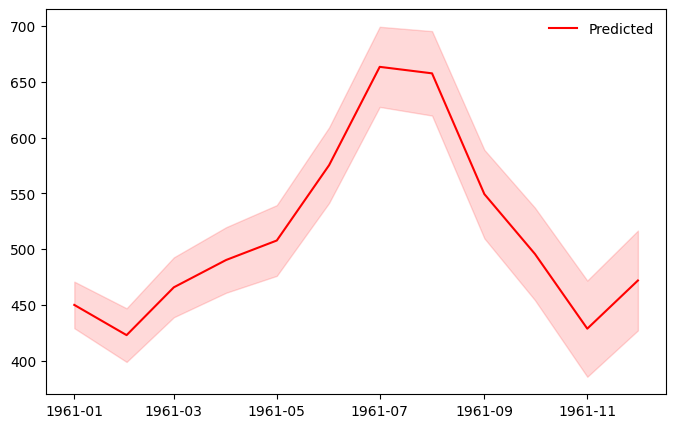

In [104]:
plt.figure(figsize=(8,5))
plt.plot(forecast, color='red', label = 'Predicted')

lower = pd.Series(confint[:, 0])
upper = pd.Series(confint[:, 1])

plt.fill_between(forecast.index, 
                 lower, 
                 upper, 
                 color='r', alpha=.15)

plt.legend(loc='best', frameon=False)

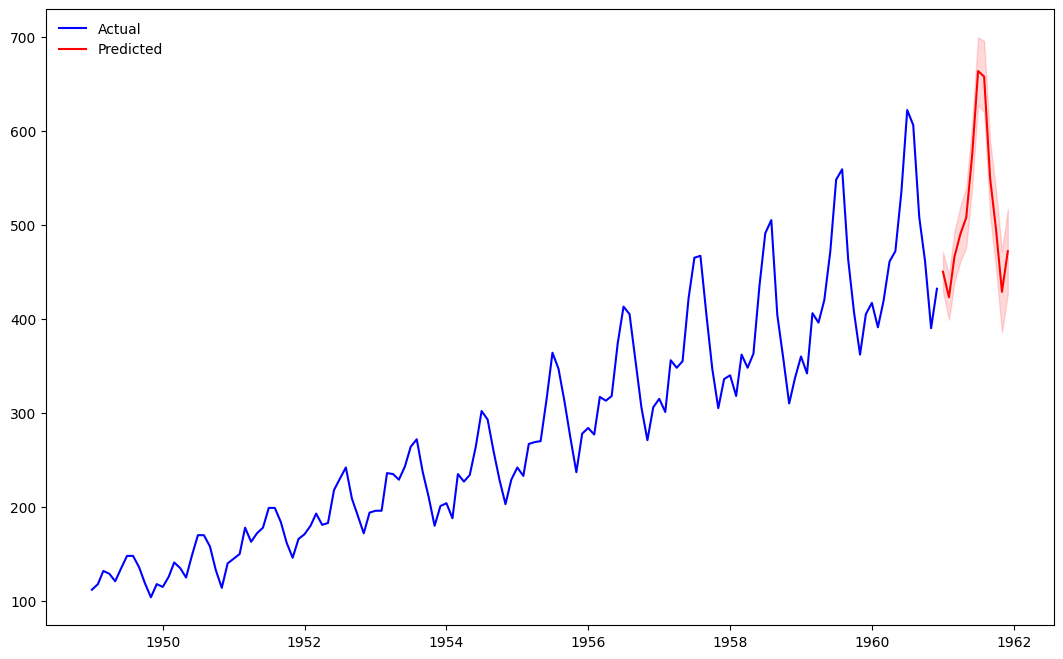

In [106]:
plt.figure(figsize=(13,8))
plt.plot(Passenger, color = 'blue', label = 'Actual')
plt.plot(forecast, color='red', label = 'Predicted')
plt.fill_between(forecast.index, 
                 lower, 
                 upper, 
                 color='r', alpha=.15)
plt.legend(loc='upper left', frameon=False)